# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import RidgeCV, LassoCV

import warnings

warnings.filterwarnings('ignore')

train = pd.read_csv('../datasets/train.csv')


In [2]:
train.isna()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,False,False,False,False,True,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
2047,False,False,False,False,True,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
2048,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False
2049,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,True,False,False,False,False,False


In [3]:
pd.set_option('display.max_columns', None)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

# Data Cleaning:

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
train.isna().sum()[train.isna().sum() == 0]

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch   

In [7]:
train.isna().sum()[train.isna().sum() != 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

## Reclassify Columns:

In [8]:
train['MS SubClass'] = train['MS SubClass'].astype(str)

In [9]:
train['Mo Sold'] = train['Mo Sold'].astype(str)

## Drop Columns:

### Pools:

Only 9 homes sold have pools so we will drop all columns related to pools.

In [10]:
train.drop(columns = ['Pool QC', 'Pool Area'], inplace = True)

### Alley:

In [11]:
train.drop(columns = ['Alley'], inplace = True)

### Misc Features and Val:



In [12]:
train.drop(columns = ['Misc Feature', 'Misc Val'], inplace = True)

In [13]:
train.drop(columns = ['Fence'], inplace = True)

## Dealing with Nulls:

### Mas Vnr Type and Area

Replace missing type with None and replace missing area with 0

In [14]:
train['Mas Vnr Type'].fillna('None', inplace = True)
train['Mas Vnr Area'].fillna(0, inplace = True)

### Basement Variables:

Replace Qual and Cond with NA

In [15]:
train['Bsmt Qual'].fillna('NA', inplace = True)
train['Bsmt Cond'].fillna('NA', inplace = True)
train['Bsmt Exposure'].fillna('NA', inplace = True)
train['BsmtFin Type 1'].fillna('NA', inplace = True)
train['BsmtFin Type 2'].fillna('NA', inplace = True)
train['BsmtFin SF 1'].fillna(0, inplace = True)
train['BsmtFin SF 2'].fillna(0, inplace = True)
train['Bsmt Unf SF'].fillna(0, inplace = True)
train['Total Bsmt SF'].fillna(0, inplace = True)
train['Bsmt Full Bath'].fillna(0, inplace = True)
train['Bsmt Half Bath'].fillna(0, inplace = True)

### Garage Variables

In [16]:
train['Garage Type'].fillna('NA', inplace = True)
train['Garage Finish'].fillna('NA', inplace = True)
train['Garage Qual'].fillna('NA', inplace = True)
train['Garage Cond'].fillna('NA', inplace = True)
train['Garage Cars'].fillna(0, inplace = True)
train['Garage Area'].fillna(0, inplace = True)
train['Bsmt Unf SF'].fillna(0, inplace = True)
train.drop(columns = 'Garage Yr Blt', inplace = True)

### Fireplace Variables

In [17]:
train['Fireplace Qu'].fillna('NA', inplace = True)

### Lot Frontage:

We will convert the 330 missing values to 0 (having zero lot frontage is a condition that may exist).

In [18]:
train['Lot Frontage'].fillna(0, inplace = True)

### Dropping Outliers

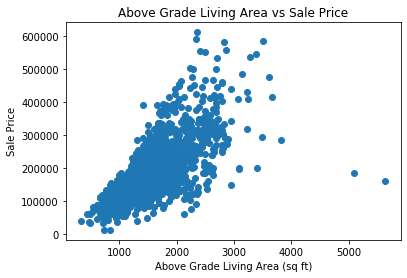

In [19]:
plt.scatter(train['Gr Liv Area'],
           train['SalePrice'])
plt.title('Above Grade Living Area vs Sale Price')
plt.xlabel('Above Grade Living Area (sq ft)')
plt.ylabel('Sale Price');

In [20]:
train.loc[(train['Gr Liv Area'] >= 5000) & (train['SalePrice'] < 300000), :]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,10,2007,New,183850


In [21]:
train.drop([960, 1885], inplace = True)

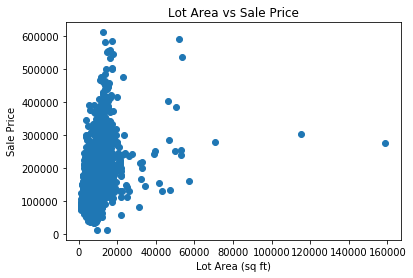

In [22]:
plt.scatter(train['Lot Area'],
           train['SalePrice'])
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price');


In [23]:
train.loc[(train['Lot Area'] >= 70000) & (train['SalePrice'] < 400000), :]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,0.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,6,2007,WD,277000
694,2072,905301050,20,RL,0.0,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,6,2007,WD,302000
1854,2767,906475200,20,RL,62.0,70761,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.0,Unf,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,1533,0,0,1533,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,Unf,2.0,576.0,TA,TA,Y,200,54,0,0,0,12,2006,WD,280000


In [24]:
train.drop([471, 694, 1854], inplace = True)

In [25]:
train['SalePrice'].describe()

count      2046.000000
mean     181325.272727
std       79251.065924
min       12789.000000
25%      129575.000000
50%      162250.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

# EDA 

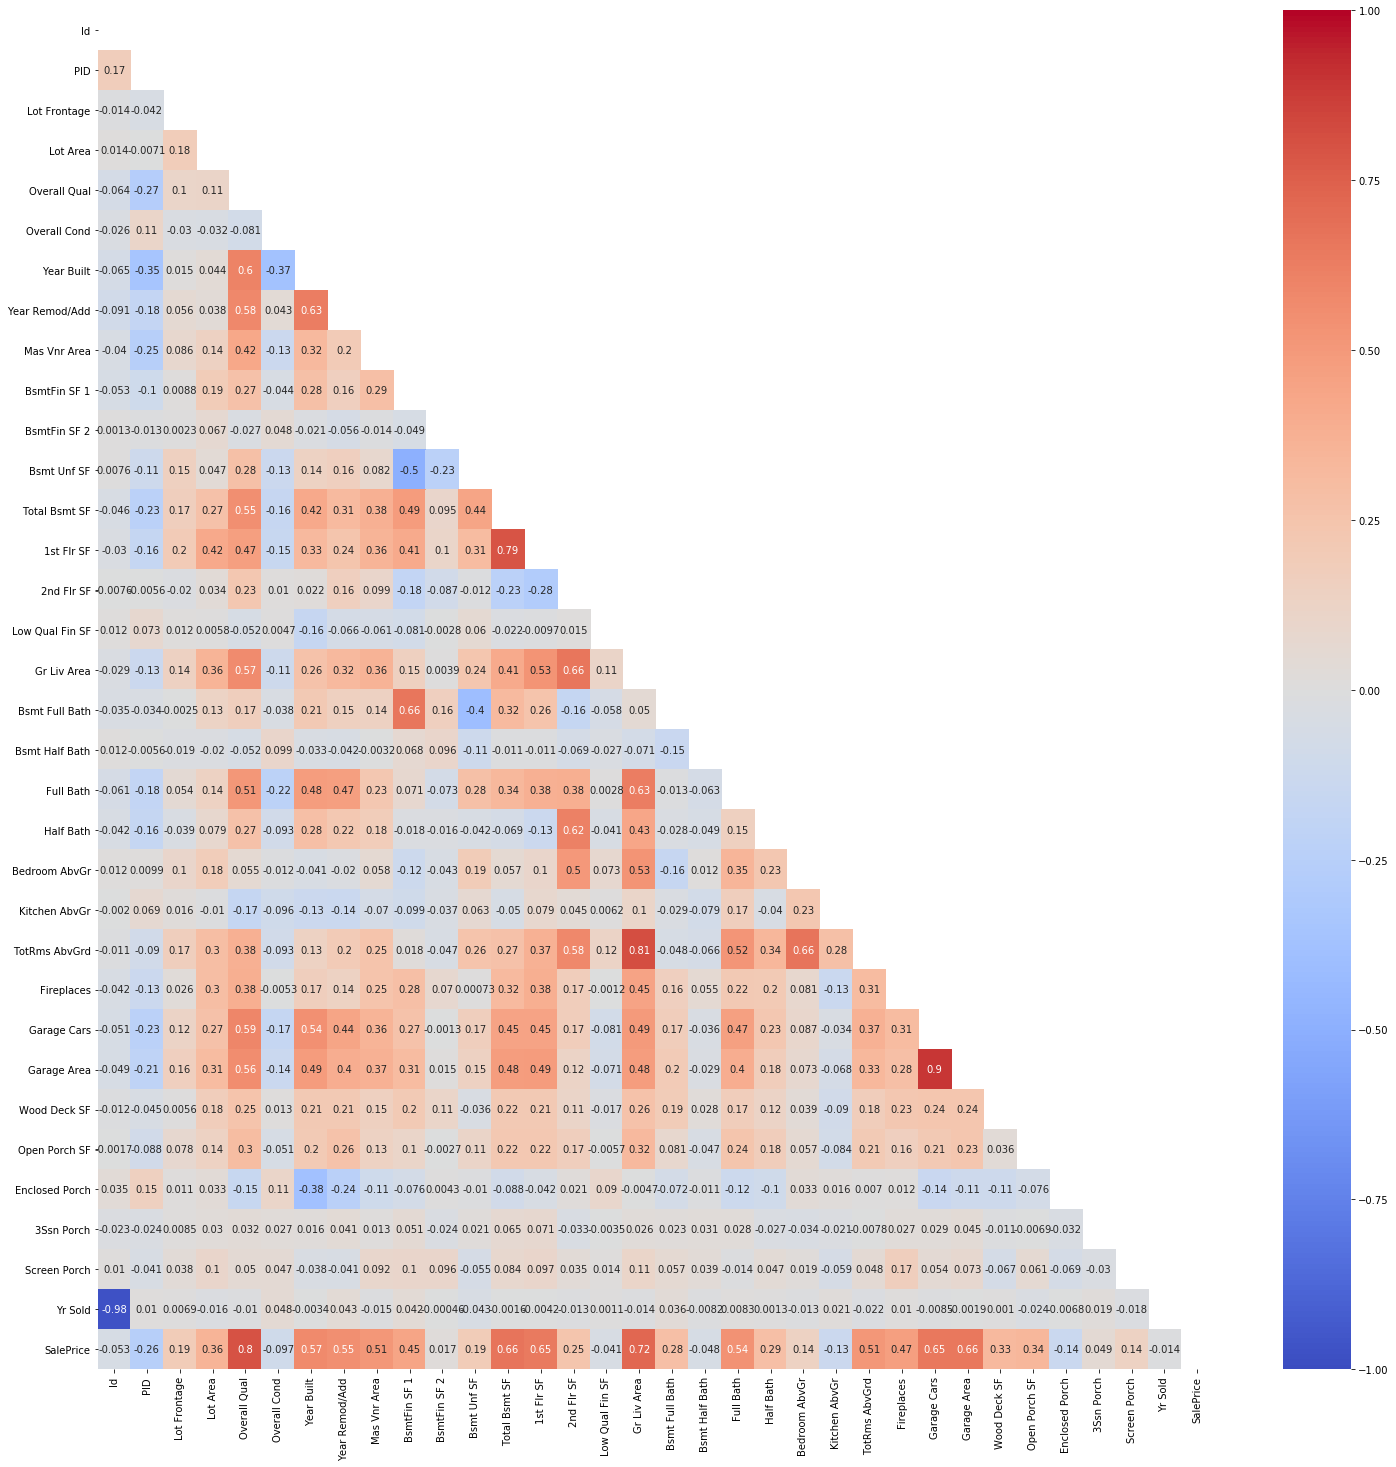

In [26]:
plt.figure(figsize = (25, 25))

mask = np.zeros_like(np.zeros_like(train.corr()))
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(),
            mask = mask,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1);

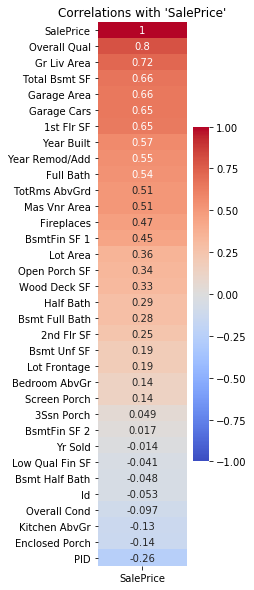

In [27]:
plt.figure(figsize = (2,10))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
plt.title('Correlations with \'SalePrice\'');

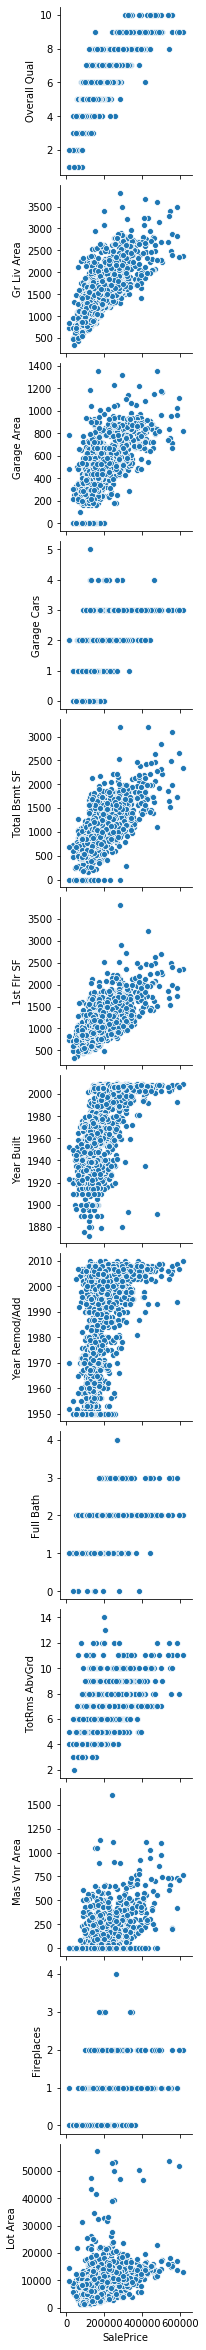

In [28]:
sns.pairplot(train, 
             x_vars=['SalePrice'], 
             y_vars= ['Overall Qual', 'Gr Liv Area', 'Garage Area', 
                      'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
                      'Year Built', 'Year Remod/Add', 'Full Bath', 
                      'TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces',
                      'Lot Area']);

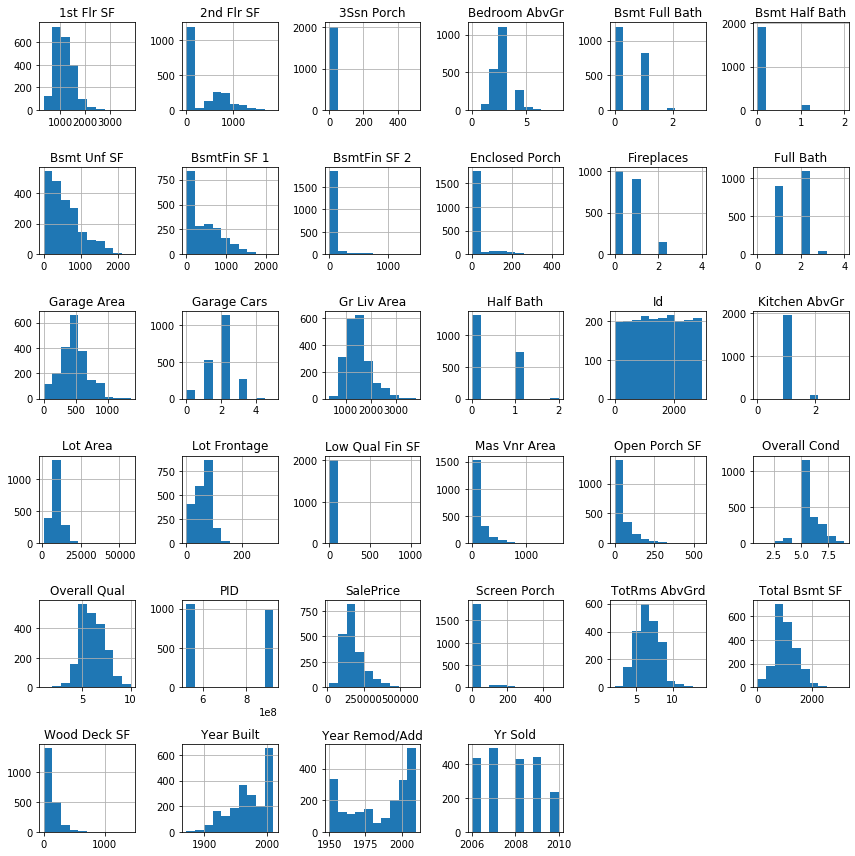

In [29]:
train._get_numeric_data().hist(figsize = (12,12))
plt.tight_layout();

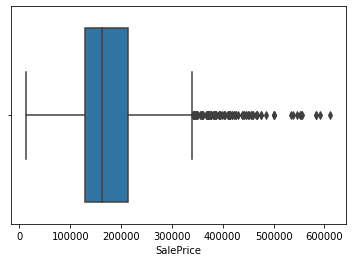

In [30]:
sns.boxplot(train['SalePrice']);

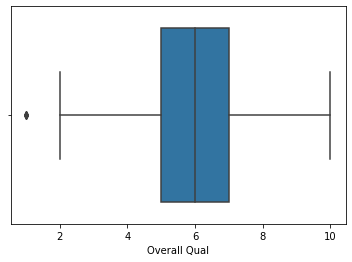

In [31]:
sns.boxplot(train['Overall Qual']);

In [32]:
train.to_csv('../datasets/train_clean.csv')

# Feature Engineering:

In [33]:
train['porch sf'] = train['Wood Deck SF'] + train['Open Porch SF'] + \
                    train['Enclosed Porch'] + train['3Ssn Porch'] + \
                    train['Screen Porch']

In [34]:
train['age at sale'] = train['Yr Sold'] - train['Year Built']

In [35]:
train['age remod'] = train['Yr Sold'] - train['Year Remod/Add']

In [36]:
train['total baths'] = train['Full Bath'] + train['Half Bath'] + train['Bsmt Full Bath'] + train['Bsmt Half Bath']

In [37]:
train['garage area_cars'] = train['Garage Area'] * train['Garage Cars']

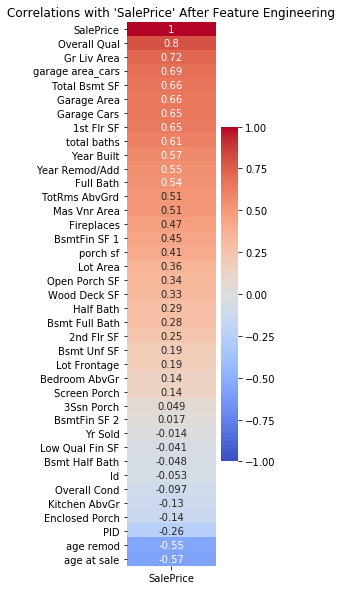

In [38]:
plt.figure(figsize = (2,10))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
plt.title('Correlations with \'SalePrice\' After Feature Engineering');

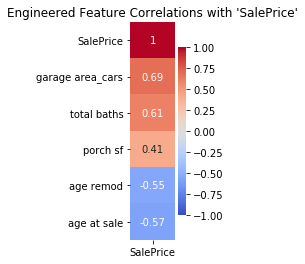

In [104]:
eng = train[['porch sf','age at sale','age remod','total baths',
            'garage area_cars', 'SalePrice']]
plt.figure(figsize = (1,4))
sns.heatmap(eng.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
plt.title('Engineered Feature Correlations with \'SalePrice\'');

In [40]:
features = train[[ 'garage area_cars', 'total baths', 'porch sf',
                   'age remod', 'age at sale', 'SalePrice']]

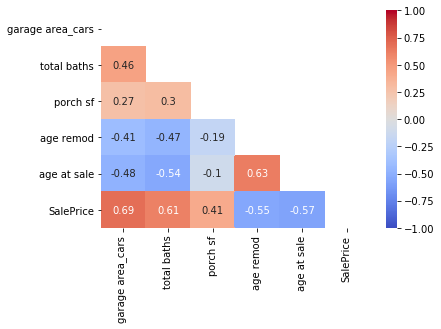

In [41]:
mask = np.zeros_like(np.zeros_like(features.corr()))
mask[np.triu_indices_from(mask)] = True

sns.heatmap(features.corr(),
            annot = True,
            mask = mask,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1);

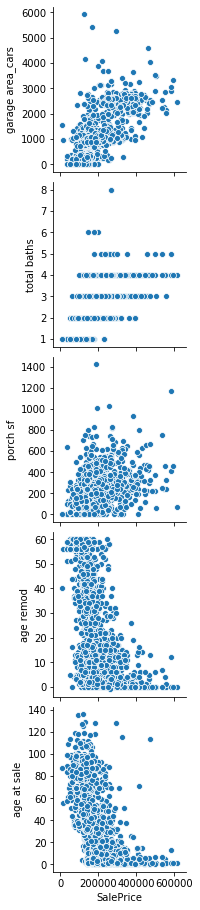

In [42]:
sns.pairplot(train, 
             x_vars=['SalePrice'], 
             y_vars= ['garage area_cars', 'total baths', 'porch sf',
                   'age remod', 'age at sale']);

### Dummies:

In [43]:
train = pd.get_dummies(train, 
                       columns = ['Neighborhood', 'Exter Qual', 
                                 'Kitchen Qual', 'Bsmt Qual', 'Foundation',
                                 'MS SubClass', 'Garage Type', 
                                 'Fireplace Qu', 'Heating QC', 
                                 'BsmtFin Type 1', 'Mas Vnr Type', 
                                 'Garage Finish', 'Exterior 1st', 
                                 'Exterior 2nd', 'Bsmt Exposure',
                                 'Sale Type', 'MS Zoning', 'Lot Shape',
                                 'Garage Qual', 'Paved Drive', 
                                 'Garage Cond', 'Roof Style', 
                                 'House Style', 'Central Air', 
                                 'Electrical', 'Bsmt Cond','Land Contour', 
                                 'Condition 1', 'Bldg Type', 'Lot Config',
                                 'Exter Cond', 'Functional', 'Street', 
                                 'Utilities', 'Land Slope', 'Condition 2',
                                 'Roof Matl', 'BsmtFin Type 2', 'Heating',
                                 ], 
                       drop_first = True)

In [44]:
train['Kitchen Qual_Po'] = 0

In [45]:
train[ 'Mas Vnr Type_CBlock'] = 0

In [46]:
train[ 'Exterior 1st_PreCast'] = 0

In [47]:
train[ 'Exterior 2nd_Other'] = 0

In [48]:
train[ 'Exterior 2nd_PreCast'] = 0

In [49]:
train[ 'Sale Type_VWD'] = 0

In [50]:
train[ 'Roof Matl_Metal'] = 0

In [51]:
train[ 'Roof Matl_Roll'] = 0

In [52]:
train[ 'Heating_GasA'] = 0

In [53]:
list(train.columns)

['Id',
 'PID',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'porch sf',
 'age at sale',
 'age remod',
 'total baths',
 'garage area_cars',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAm

In [54]:
train.to_csv('../datasets/train_eng.csv')

In [55]:
train.shape

(2046, 273)

# TEST:

Complete all of the same cleaning procedures on the Test set so that we do not have any issues when fitting the model for Kaggle.

In [56]:
test = pd.read_csv('../datasets/test.csv')


## Cleaning

In [57]:
test['MS SubClass'] = test['MS SubClass'].astype(str)

In [58]:
test['Mo Sold'] = test['Mo Sold'].astype(str)

In [59]:
test.drop(columns = ['Pool QC', 'Pool Area'], inplace = True)

In [60]:
test.drop(columns = ['Alley'], inplace = True)

In [61]:
test.drop(columns = ['Misc Feature', 'Misc Val'], inplace = True)

In [62]:
test.drop(columns = ['Fence'], inplace = True)

In [63]:
test['Mas Vnr Type'].fillna('None', inplace = True)
test['Mas Vnr Area'].fillna(0, inplace = True)

In [64]:
test['Bsmt Qual'].fillna('NA', inplace = True)
test['Bsmt Cond'].fillna('NA', inplace = True)
test['Bsmt Exposure'].fillna('NA', inplace = True)
test['BsmtFin Type 1'].fillna('NA', inplace = True)
test['BsmtFin Type 2'].fillna('NA', inplace = True)
test['BsmtFin SF 1'].fillna(0, inplace = True)
test['BsmtFin SF 2'].fillna(0, inplace = True)
test['Bsmt Unf SF'].fillna(0, inplace = True)
test['Total Bsmt SF'].fillna(0, inplace = True)
test['Bsmt Full Bath'].fillna(0, inplace = True)
test['Bsmt Half Bath'].fillna(0, inplace = True)

In [65]:
test['Garage Type'].fillna('NA', inplace = True)
test['Garage Finish'].fillna('NA', inplace = True)
test['Garage Qual'].fillna('NA', inplace = True)
test['Garage Cond'].fillna('NA', inplace = True)
test['Garage Cars'].fillna(0, inplace = True)
test['Garage Area'].fillna(0, inplace = True)
test['Bsmt Unf SF'].fillna(0, inplace = True)
test.drop(columns = 'Garage Yr Blt', inplace = True)

In [66]:
test['Fireplace Qu'].fillna('NA', inplace = True)


In [67]:
test['Lot Frontage'].fillna(0, inplace = True)


In [68]:
test.to_csv('../datasets/test_clean.csv')

### Feature Engineering

In [69]:
test['porch sf'] = test['Wood Deck SF'] + test['Open Porch SF'] + \
                    test['Enclosed Porch'] + test['3Ssn Porch'] + \
                    test['Screen Porch']

In [70]:
test['age at sale'] = test['Yr Sold'] - test['Year Built']

In [71]:
test['age remod'] = test['Yr Sold'] - test['Year Remod/Add']

In [72]:
test['total baths'] = test['Full Bath'] + test['Half Bath'] + test['Bsmt Full Bath'] + test['Bsmt Half Bath']

In [73]:
test['garage area_cars'] = test['Garage Area'] * test['Garage Cars']

### Dummies:

In [74]:
test = pd.get_dummies(test, 
                       columns = ['Neighborhood', 'Exter Qual', 
                                 'Kitchen Qual', 'Bsmt Qual', 'Foundation',
                                 'MS SubClass', 'Garage Type', 
                                 'Fireplace Qu', 'Heating QC', 
                                 'BsmtFin Type 1', 'Mas Vnr Type', 
                                 'Garage Finish', 'Exterior 1st', 
                                 'Exterior 2nd', 'Bsmt Exposure',
                                 'Sale Type', 'MS Zoning', 'Lot Shape',
                                 'Garage Qual', 'Paved Drive', 
                                 'Garage Cond', 'Roof Style', 
                                 'House Style', 'Central Air', 
                                 'Electrical', 'Bsmt Cond','Land Contour', 
                                 'Condition 1', 'Bldg Type', 'Lot Config',
                                 'Exter Cond', 'Functional', 'Street', 
                                 'Utilities', 'Land Slope', 'Condition 2',
                                 'Roof Matl', 'BsmtFin Type 2', 'Heating',
                                 ], 
                       drop_first = True)

In [75]:
test['MS SubClass_150'] = 0

In [76]:
test['Garage Qual_Fa'] = 0

In [77]:
test['Neighborhood_GrnHill'] = 0

In [78]:
test['Neighborhood_Landmrk'] = 0

In [79]:
test[ 'Heating QC_Po'] = 0

In [80]:
test['Exterior 1st_CBlock'] = 0

In [81]:
test['Exterior 1st_ImStucc'] = 0

In [82]:
test['Exterior 1st_Stone'] = 0

In [83]:
test['Exterior 2nd_Stone'] = 0

In [84]:
test['MS Zoning_C (all)'] = 0

In [85]:
test[ 'Electrical_Mix'] = 0

In [86]:
test[ 'Bsmt Cond_Fa'] = 0

In [87]:
test[ 'Bsmt Cond_Po'] = 0

In [88]:
test[ 'Functional_Sal'] = 0

In [89]:
test[ 'Functional_Sev'] = 0

In [90]:
test[  'Utilities_NoSeWa'] = 0

In [91]:
test[  'Condition 2_Feedr'] = 0

In [92]:
test[  'Condition 2_PosN'] = 0

In [93]:
test[  'Condition 2_RRAe'] = 0

In [94]:
test[  'Condition 2_RRAn'] = 0

In [95]:
test[  'Condition 2_RRNn'] = 0

In [96]:
test[  'Roof Matl_Membran'] = 0

In [97]:
test[  'Heating_OthW'] = 0

In [98]:
test[ 'Heating QC_Po'] = 0

In [99]:
test[  'Heating_Wall'] = 0

In [100]:
test.to_csv('../datasets/test_eng.csv')

In [101]:
list(test.columns)

['Id',
 'PID',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Mo Sold',
 'Yr Sold',
 'porch sf',
 'age at sale',
 'age remod',
 'total baths',
 'garage area_cars',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighbor